In [21]:
import matplotlib.pyplot as plt
import warnings
import matplotlib.cbook
import pandas as pd
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [22]:
import phoebe
import numpy as np

logger = phoebe.logger('error')

In [23]:
b=phoebe.default_binary()

In [24]:
print(b.get_adjustable_parameters())

ParameterSet: 30 parameters
                  distance@system: 1.0 m
                    vgamma@system: 0.0 km / s
                        Av@system: 0.0
                        Rv@system: 3.1
         requiv@primary@component: 1.0 solRad
           teff@primary@component: 6000.0 K
           abun@primary@component: 0.0
        syncpar@primary@component: 1.0
          pitch@primary@component: 0.0 deg
            yaw@primary@component: 0.0 deg
      gravb_bol@primary@component: 0.32
   irrad_frac_refl_bol@primary...: 0.6
       requiv@secondary@component: 1.0 solRad
         teff@secondary@component: 6000.0 K
         abun@secondary@component: 0.0
      syncpar@secondary@component: 1.0
        pitch@secondary@component: 0.0 deg
          yaw@secondary@component: 0.0 deg
    gravb_bol@secondary@component: 0.32
   irrad_frac_refl_bol@seconda...: 0.6
          period@binary@component: 1.0 d
            dpdt@binary@component: 0.0 s / yr
            per0@binary@component: 0.0 deg
          d

### Paper: Discovery of β Cep pulsations in the eclipsing binary V453 Cygni [doi:10.1093/mnrasl/slaa091]

<img src=chttps://github.com/Vysakh13579/FITTING_BINARIES/blob/85a643457cd860a495f999754a7afb6de2fc7ea5/parameters.png](https://github.com/Vysakh13579/FITTING_BINARIES/blob/85a643457cd860a495f999754a7afb6de2fc7ea5/parameters.png 'Title' )


In [25]:
b['vgamma@system']=-6.28

b['requiv@primary@component']=0.793
b['requiv@secondary@component']=0.344

b['teff@primary@component']=5560
b['teff@secondary@component']=3540

b['sma@binary@component']=11.03

b['period@binary@component']= 4.12879
b['per0@binary@component']=92.8
b['ecc@binary@component']=0.0365
b['incl@binary@component']=87.003
b['q@binary@component']=0.553
b['t0_supconj@binary@component']=1


In [26]:
b['gravb_bol@primary@component']=0.4353
b['gravb_bol@secondary@component']=0.3712

## Spots

In [27]:
b.add_feature('spot', component='primary', feature='spot01')
b.add_feature('spot', component='primary', feature='spot02')

<ParameterSet: 5 parameters | contexts: compute, feature>

In [28]:
b.set_value(qualifier='relteff', feature='spot01', value=0.98141)
b.set_value(qualifier='radius', feature='spot01', value=19.97)
b.set_value(qualifier='colat', feature='spot01', value=81.3)
b.set_value(qualifier='long', feature='spot01', value=18.2)

b.set_value(qualifier='relteff', feature='spot02', value=0.9801)
b.set_value(qualifier='radius', feature='spot02', value=14.5)
b.set_value(qualifier='colat', feature='spot02', value=34.9)
b.set_value(qualifier='long', feature='spot02', value= 286.31)

In [29]:
print(b['Av@system'])

Parameter: Av@system
                       Qualifier: Av
                     Description: Extinction Av
                           Value: 0.0
                  Constrained by: 
                      Constrains: ebv@system
                      Related to: Rv@system, ebv@system



In [30]:
lctimes=phoebe.linspace(0,15,501)
rvtimes=phoebe.linspace(0,15,101)
b.add_dataset('lc', times=lctimes, dataset='lc01',overwrite=True)
b.add_dataset('rv', times=rvtimes, dataset='rv01',overwrite=True)

<ParameterSet: 81 parameters | contexts: compute, constraint, figure, dataset>

### As the above did not have limb darkening values, I refered to the previous paper by the same author
[doi:10.1093/mnras/sty2516]

![https://github.com/Vysakh13579/FITTING_BINARIES/blob/85a643457cd860a495f999754a7afb6de2fc7ea5/param2.png](https://github.com/Vysakh13579/FITTING_BINARIES/blob/85a643457cd860a495f999754a7afb6de2fc7ea5/param2.png "Title")

In [31]:
b.set_value_all('atm','phoenix')
b.set_value_all('passband','Johnson:V')

In [32]:
print(b.filter(dataset='lc01'))

ParameterSet: 26 parameters
               times@lc01@dataset: [ 0.    0.03  0.06 ... 14.94 14.97 15.  ] d
              fluxes@lc01@dataset: [] W / m2
            passband@lc01@dataset: Johnson:V
    intens_weighting@lc01@dataset: energy
       compute_times@lc01@dataset: [] d
C     compute_phases@lc01@dataset: []
           phases_t0@lc01@dataset: t0_supconj
        mask_enabled@lc01@dataset: True
         mask_phases@lc01@dataset: []
        solver_times@lc01@dataset: auto
              sigmas@lc01@dataset: [] W / m2
          pblum_mode@lc01@dataset: component-coupled
     pblum_component@lc01@dataset: primary
             l3_mode@lc01@dataset: flux
                  l3@lc01@dataset: 0.0 W / m2
             exptime@lc01@dataset: 0.0 s
    enabled@lc01@phoebe01@compute: True
      fti_method@phoebe01@compute: none
     ld_mode@primary@lc01@dataset: interp
   ld_mode@secondary@lc01@dataset: interp
       pblum@primary@lc01@dataset: 12.566370614359172 W
   compute_phases@lc01@constrai

In [33]:
b.set_value_all(qualifier='ld_mode', value='manual')
b.set_value_all(qualifier='ld_func', value='square_root')
b.set_value_all(qualifier='ld_coeffs', component='primary', value=[0.4786, 0.3242])
b.set_value_all(qualifier='ld_coeffs', component='secondary', value=[ 0.1759, 0.7896])

In [34]:
b.set_value_all('ld_mode_bol', 'manual')
b.set_value_all('ld_func_bol','square_root')
b.set_value('ld_coeffs_bol@primary@component',[ 0.3811, 0.3636])
b.set_value('ld_coeffs_bol@secondary@component',[-0.0427, 0.8284])
b.set_value('irrad_frac_refl_bol@primary@component',0.6)
b.set_value('irrad_frac_refl_bol@secondary@component',0.6)



In [35]:
b.set_value_all('l3_mode', 'fraction')
b.set_value_all('l3_frac', 0.02297)

In [36]:
print(b.run_checks())

Run Checks Report: PASS



In [37]:
b.add_compute('phoebe', compute='fastcompute',overwrite=True)
b.run_compute(compute='fastcompute')

fluxes = b.get_value('fluxes@model') + np.random.normal(size=lctimes.shape) * 0.001
fsigmas = np.ones_like(lctimes) * 0.002

rvsA = b.get_value('rvs@primary@model') + np.random.normal(size=rvtimes.shape) * 7.5
rvsB = b.get_value('rvs@secondary@model') + np.random.normal(size=rvtimes.shape) * 7.5
rvsigmas = np.ones_like(rvtimes) * 15

100%|█████████████████████████████████████████████████████████████████████████| 501/501 [03:12<00:00,  2.60it/s]


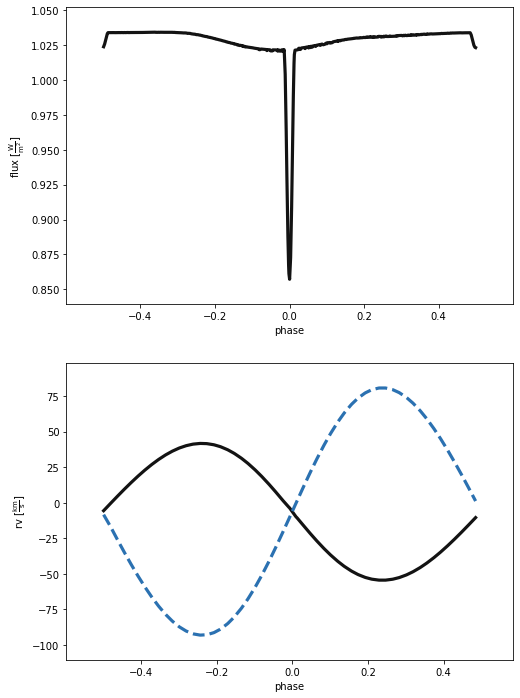

(<autofig.figure.Figure | 2 axes | 3 call(s)>,
 <Figure size 576x864 with 2 Axes>)

In [38]:
b.plot(x='phases',show=True,legends=True)

In [39]:
nb = phoebe.default_binary()
nb['period@binary@component']=4.12879

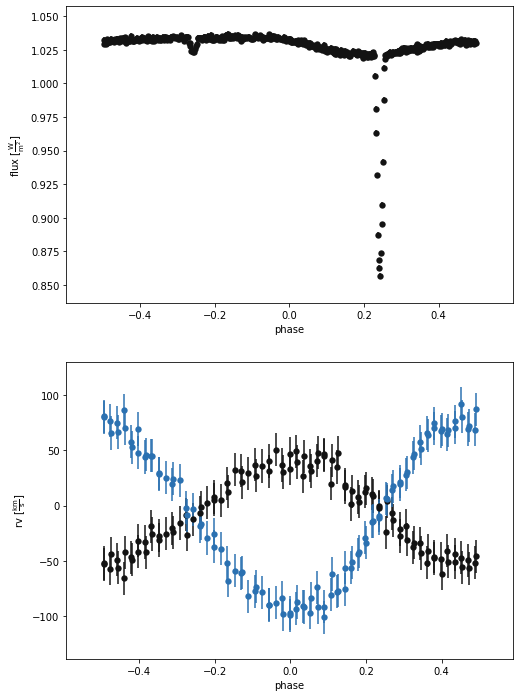

In [40]:
nb.add_dataset('lc', times = lctimes, fluxes=fluxes, sigmas=fsigmas,dataset='lc01', passband='Johnson:V',overwrite=True)
nb.add_dataset('rv',dataset='rv01',overwrite=True)
nb['times@rv@primary'], nb['rvs@rv@primary'], nb['sigmas@rv@primary'] = rvtimes, rvsA, rvsigmas
nb['times@rv@secondary'], nb['rvs@rv@secondary'], nb['sigmas@rv@secondary'] = rvtimes, rvsB, rvsigmas
_ = nb.plot(x='phases', show=True,m='.')

In [41]:
data1=pd.DataFrame({'Times':lctimes,
                   'Fluxes':fluxes,
                   'Sigma':fsigmas})
data1.to_csv('lcdata_wspot.out',index=False,header=False)

In [42]:
data2=pd.DataFrame({'Times':rvtimes,
                   'Fluxes':rvsA,
                       'Sigma':rvsigmas})
data2.to_csv('rv1data_wspot.out',index=False,header=False)

data3=pd.DataFrame({'Times':rvtimes,
                   'Fluxes':rvsB,
                       'Sigma':rvsigmas})
data3.to_csv('rv2data_wspot.out',index=False,header=False)